### Activity 1 (Monday)

In [47]:
import numpy as np
import seaborn as sns
import pandas as pd
df_1 = pd.read_csv('Data/file1.csv')
df_2 = pd.read_csv('Data/file2.csv')
df_3 = pd.read_csv('Data/file3.csv')

 - **Aggregate data into one Data Frame using Pandas. Pay attention that files may have different names for the same column. therefore, make sure that you unify the columns names before concating them.**
 - **Standardizing header names**

In [48]:
#Columns rename function
#we create a function in order to standarise the name of the headers, besides, we rename then with 'Data Base friendlye.g. 'customer_lifetime_value'.
def rename(x):    
    x = x.rename(columns ={"Customer":"customer", 
                           "ST":"state",
                           "State":"state",
                           "GENDER":"gender", 
                           "Gender":"gender",
                           "Education":"education",
                           "Customer Lifetime Value":"customer_lifetime_value", 
                           "Income":"income", 
                           "Monthly Premium Auto":"monthly_premium_auto", 
                           "Number of Open Complaints":"number_of_open_complaints",
                           "Policy Type":"policy_type", 
                           "Vehicle Class":"vehicle_class", 
                           "Total Claim Amount":"total_claim_amount"})
    return x

In [49]:
df_1 = rename(df_1)
df_2 = rename(df_2)
df_3= rename(df_3)

df = pd.concat([df_1,df_2,df_3])

In [50]:
df.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


- **Removing duplicates**

In [51]:
df = df.drop_duplicates() #we remove the duplicates in the dataframe. (drop_duplicates)

- **Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data**

In [52]:
df = df.drop(columns='customer', axis=1) #remove the columnn. (drop)

- **Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of open complaints ). Hint: remove the percentage from the customer lifetime value and truncate it to an integer value.**

In [53]:
df["customer_lifetime_value"] = df["customer_lifetime_value"].apply(lambda x: float(x.rstrip('%')) / 100.0  if isinstance(x,str) else x)

In [54]:
def decimals(x):
    x = round(x,2)
    return x

df["customer_lifetime_value"] = decimals(df['customer_lifetime_value'])
df["total_claim_amount"] = decimals(df['total_claim_amount'])

In [55]:
df.head()

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.70
1,Arizona,F,Bachelor,6979.54,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.46
2,Nevada,F,Bachelor,12887.43,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.47
3,California,M,Bachelor,7645.86,0.0,106.0,1/0/00,Corporate Auto,SUV,529.88
4,Washington,M,High School or Below,5363.08,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.27


- **clean the number of open complaints and extract the middle number which is changing between records. pay attention that the number of open complaints is a categorical feature.**

In [70]:
df["number_of_open_complaints"] = df["number_of_open_complaints"].apply(lambda x: str(x).split("/")[1] if len(str(x).split("/"))>1 else x)
df.head()

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,7977.832121,50510.548684,1000.0,0,Personal Auto,Four-Door Car,2.70
1,Arizona,F,Bachelor,6979.540000,50510.548684,94.0,0,Personal Auto,Four-Door Car,1131.46
2,Nevada,F,Bachelor,12887.430000,48767.000000,108.0,0,Personal Auto,Two-Door Car,566.47
3,California,M,Bachelor,7645.860000,50510.548684,106.0,0,Corporate Auto,SUV,529.88
4,Washington,M,High School or Below,5363.080000,36357.000000,68.0,0,Personal Auto,Four-Door Car,17.27


### Activity 2 (Tuesday)
- **Replacing null values – Replace missing values with means of the column (for numerical columns). Pay attention that the Income feature for instance has 0s which is equivalent to null values. (We assume here that there is no such income with 0 as it refers to missing values)**

In [72]:
#we've to set the NaN value in the 0 values first (income). We create the following function. 

def zero_value(x):
    df.loc[df[x]==0, x] = None
    return df[x]

zero_value('income')
zero_value('customer_lifetime_value')
zero_value('monthly_premium_auto')
zero_value('total_claim_amount')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      9134 non-null   object 
 1   gender                     9012 non-null   object 
 2   education                  9134 non-null   object 
 3   customer_lifetime_value    9135 non-null   float64
 4   income                     9135 non-null   float64
 5   monthly_premium_auto       9135 non-null   float64
 6   number_of_open_complaints  9134 non-null   object 
 7   policy_type                9134 non-null   object 
 8   vehicle_class              9134 non-null   object 
 9   total_claim_amount         9135 non-null   float64
dtypes: float64(4), object(6)
memory usage: 785.0+ KB


In [73]:
df["income"] = df[["income"]].fillna(value=df.income.mean())
df["customer_lifetime_value"] = df[["customer_lifetime_value"]].fillna(value=df.customer_lifetime_value.mean())
df["monthly_premium_auto"] = df[["monthly_premium_auto"]].fillna(value=df.monthly_premium_auto.mean())
df["total_claim_amount"] = df[["total_claim_amount"]].fillna(value=df.total_claim_amount.mean())

- **Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central**

In [96]:
df['state'] = df['state'].replace({'Cali':'California',
                                   'AZ':'Arizona',
                                   'WA':'Washington'})

df = df.rename(columns={'state':'zone'})
df['zone'] = df['zone'].replace({'California':'west_region',
                                 'Oregon':'north_west',
                                 'Washington':'east',
                                 'Arizona':'central',
                                 'Nevada':'central'})

In [97]:
df['zone'].value_counts()

west_region    3150
north_west     2601
central        2585
east            798
Name: zone, dtype: int64

**In the column `Vehicle Class`, nerge the two categories `Luxury SUV` and `Luxury Car` into one category named `Luxury Vehicle`**

In [99]:
df['vehicle_class'] = df['vehicle_class'].replace(['Luxury SUV','Luxury Car'],'Luxury Vehicle')

Removing outliers using 1.5*IQR technique for all numerical columns.

In [101]:
income = (df['income'])
import numpy as np

Q1_income = np.percentile(income,25)
Q3_income = np.percentile(income,75)
IQR = Q3_income - Q1_income
ul = Q3_income+1.5*IQR
ll = Q1_income-1.5*IQR
outliers = income[(income > ul) | (income < ll)]
df.drop(df[ (outliers) ].index , inplace=True)

In [105]:
outliers

Series([], Name: income, dtype: float64)

### Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

**Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)**

In [2]:
numeric = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include=np.object)

/var/folders/q6/5m8hk7ms0p99xywmg31pkhym0000gn/T/ipykernel_24613/123256578.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(include=np.object)


**Now we will try to check the normality of the numerical variables visually**
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms.
- Do the distributions for different numerical variables look like a normal distribution

/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


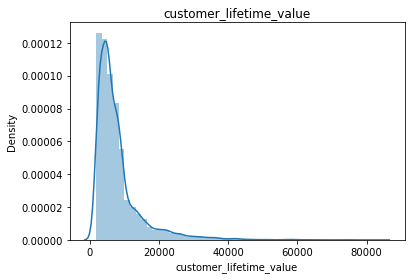

/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


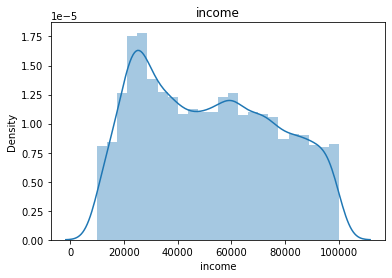

/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


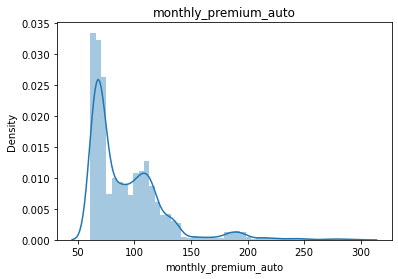

/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


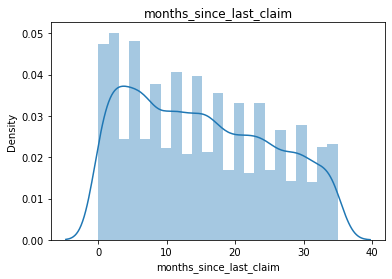

/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


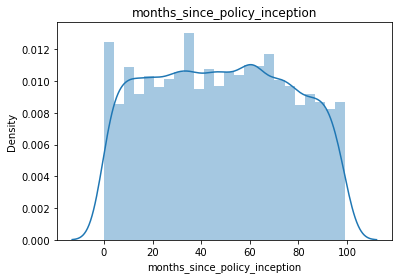

/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


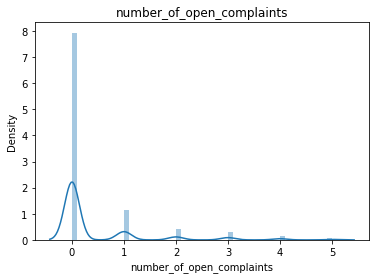

/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


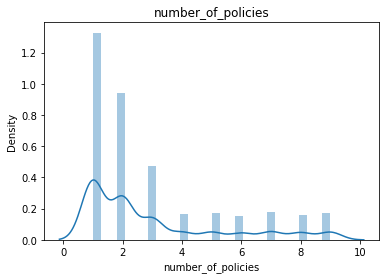

/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


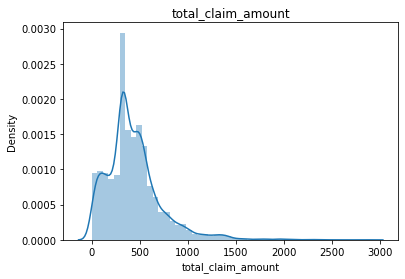

In [3]:
for i, col in enumerate(numeric.columns):
    plt.figure(i)
    sns.distplot(numeric[col])
    plt.title(col)
    plt.show()

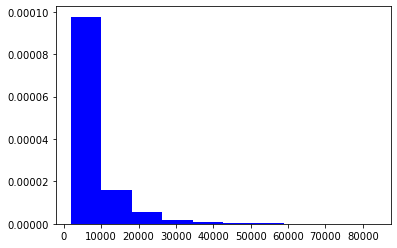

In [4]:
colors = ['blue']
plt.hist(numeric['customer_lifetime_value'], density=True, histtype='bar', color=colors)
plt.show()

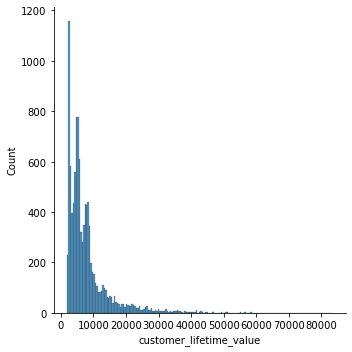

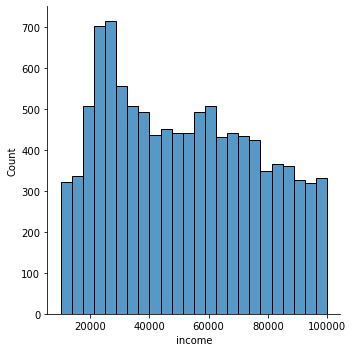

In [5]:
sns.displot(numeric.customer_lifetime_value)
sns.displot(numeric.income)
plt.show()

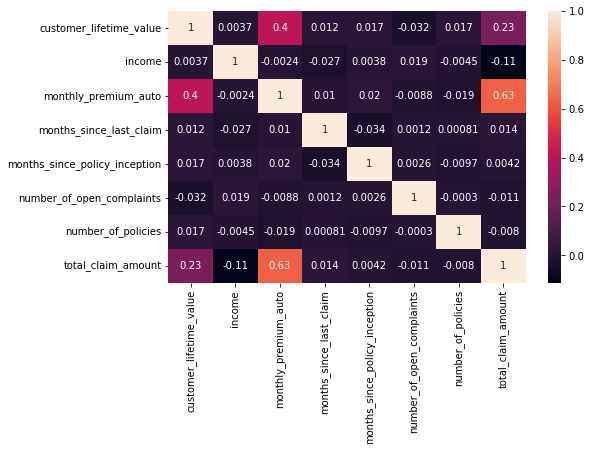

In [6]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numeric.corr(),annot=True)
plt.show()

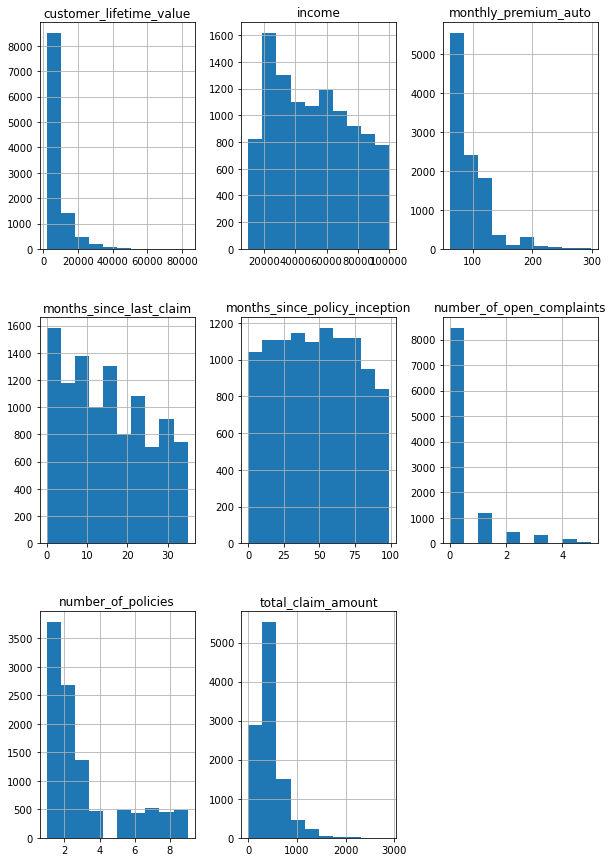

In [7]:
numeric.hist(figsize=(10,15))
plt.show()

### Activity 4 (Thursday)

- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
- (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.
- Clean your notebook and make it a readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [10]:
categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


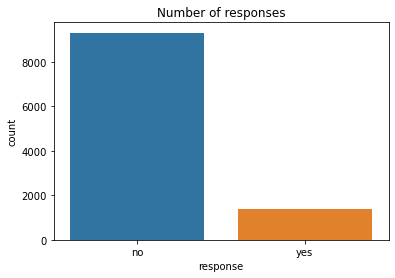

In [11]:
fig3, ax3 = plt.subplots()
ax3.set_title("Number of responses")
sns.countplot(x = categoricals['response'])

plt.show()

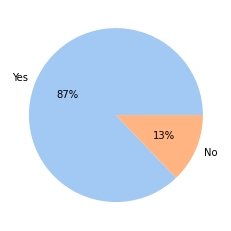

In [12]:
colors = sns.color_palette('pastel')[0:5]
labels = ['Yes', 'No']
response_count = categoricals['response'].value_counts()

plt.pie(response_count, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

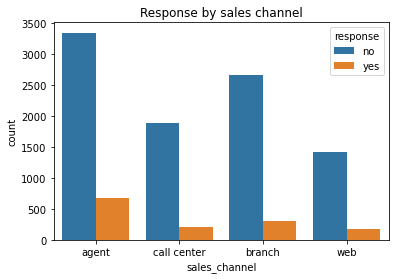

In [13]:
fig5, ax5 = plt.subplots()
df_channel_response = categoricals[['response','sales_channel']]
ax5.set_title("Response by sales channel")


sns.countplot(x="sales_channel", hue = "response", data=categoricals)

plt.show()

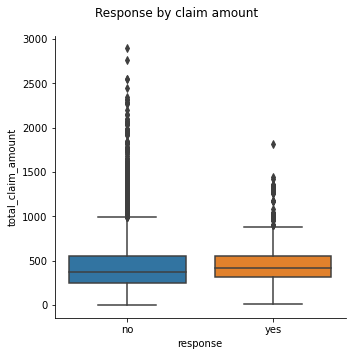

In [14]:
rp = sns.catplot(x='response', y='total_claim_amount', data = df, kind= "box")

rp.fig.subplots_adjust(top=0.9) 
rp.fig.suptitle('Response by claim amount')
plt.show()


/Users/asierbilbaotoucet/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


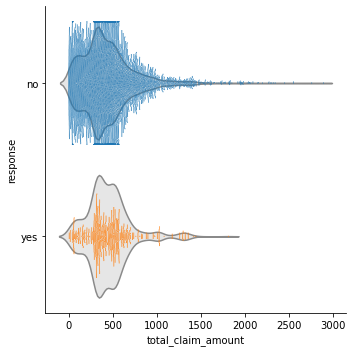

In [15]:
sns.catplot(data=df, x="total_claim_amount", y="response", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df, x="total_claim_amount", y="response", size=1)
plt.show()

NameError: name 'numerical' is not defined

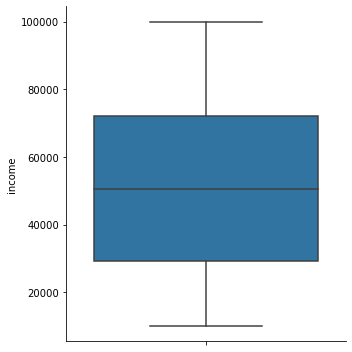

In [16]:
#Show a plot of the response by income.

sns.catplot(y='income', data = numeric, kind= "box")

plt.hist(numerical['income'], edgecolor="red", bins=5)

numeric.info()

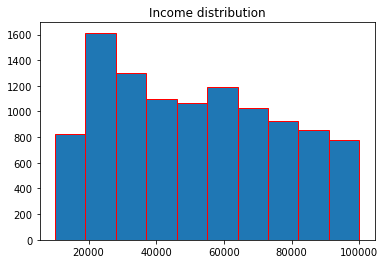

In [17]:
income = list(numeric['income'])

plt.hist(income, edgecolor="red", stacked=True, bins=10)
plt.title('Income distribution')
plt.show()

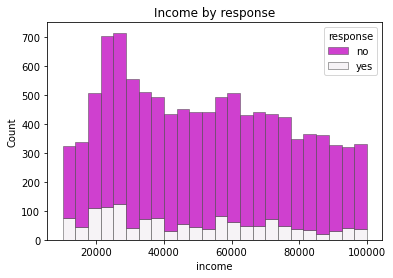

In [18]:
df_income_response = df[['income','response']]

sns.histplot(
    df_income_response,
    x="income", hue="response",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)
plt.title('Income by response')
plt.show()